### KNN Density Estimation

### Q1: implement density estimation using the K-NN method. 

#### Data Preparation

Obtain an iid sample of N ≥ 1 points from a univariate normal (Gaussian) distribution (let us call the random variable X) centered at 1 and with variance 2

#### Density Estimation

Now, empirically obtain an estimate of the density from the sample points using the K-NN method, for any value of K, where 1 ≤ K ≤ N.

Produce one plot for each of the following cases 

(each plot should show the following three items: 
- the N data points (instances or realizations of X) and 
- the true and estimated densities versus x for a large number – e.g., 1000, 10000
– of discrete, linearly-spaced x values): 

(i) K = N = 1, 

(ii) K = 2, N = 10, 

(iii) K = 10, N=10,

(iv)K=10,N=1000,

(v)K=100,N=1000,

(vi)K=N=50,000. 

Please provide appropriate axis labels and legends. 

Thus there should be a total of six figures
(plots), each figure similar to Fig. 8 on p. 20 of the pdf notes.


In [244]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [361]:
def density_estimation_knn(N, K, 
                          mean_value=1,variance_val=2, seed_value=12,
                          n_linearly_spaced_discrete_values=1000):
    
    np.random.seed(seed_value)
    # variance = square(standard_deviation)
    # scale is standard deviation
    # hence sqrt(variance_value) = scale/standard_deviation
    gaussian = norm(loc=mean_value, scale=math.sqrt(variance_val))
    
    # input data is X
    input_data = gaussian.rvs(N)
    #input_data = np.random.normal(loc=mean_value, scale=math.sqrt(variance_val), size=N)
    print("Distribution Stats:")
    print("Size: ", len(input_data),
         "X-Min: ", input_data.min(), "X-Max: ", input_data.max())
    
    linearly_spaced_discrete_values = np.linspace(start=-8, 
                                                  stop=8, 
                                                  num=n_linearly_spaced_discrete_values)
    
    print("n_linearly_spaced_discrete_values: ", len(linearly_spaced_discrete_values))
    
    N = len(input_data)
    probabilities = np.zeros_like(linearly_spaced_discrete_values)
    
    fig, axes = plt.subplots(1,1, figsize=(8, 5))
    for index, x_discrete_val in enumerate(linearly_spaced_discrete_values):
        distances = np.abs(input_data - x_discrete_val)
        neighbor_indices_of_sorted_distances = distances.argsort()
        kth_neighbor_distance = neighbor_indices_of_sorted_distances[K-1]
        """
        dV = πd/2/Γ(d2 +1)rd 
        f(x) = K/N * 1/dV
        
        where Γ(·) indicates the gamma function. (Recap: For a positive integer n, 
        Γ(n) = (n − 1)! and Γ(1) = √π, Γ(3) = 1√π, etc.) (Verify: the volume of a
        sphere (d = 3) is 4πr3; the area
         22
         
        When d=1, dV = 2 * rd
        """
        dV = (2 * distances[kth_neighbor_distance])
        probabilities[index] =  (K/N) * 1/dV
        # (K/n) * 1/(2 * dists[neighbour_K])
        
    line1, = axes.plot(linearly_spaced_discrete_values, gaussian.pdf(linearly_spaced_discrete_values))
    line2, = axes.plot(linearly_spaced_discrete_values, probabilities)
    points3, = axes.plot(input_data, np.zeros_like(input_data), 'bo', color='black')
    axes.set_title(f"K-NN density estimation K={K},N={N}")
    axes.set_xlabel("Discrete linearly spaced x values")
    axes.legend([line1, line2, points3], ['True (unknown) density', 'Estimated density', 'Training points'])

##### case-1

Distribution Stats:
Size:  1 X-Min:  -0.535313522914939 X-Max:  -0.535313522914939
n_linearly_spaced_discrete_values:  1000


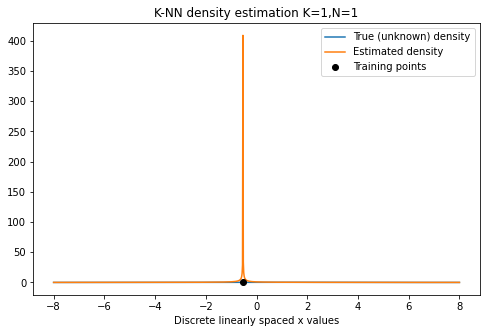

In [362]:
density_estimation_knn(N=1,K=1,
                       mean_value=1,variance_val=2, seed_value=123,
                       n_linearly_spaced_discrete_values=1000)

# Note that variance will be 0 for N=1

##### case-2:

Distribution Stats:
Size:  10 X-Min:  -0.8364567882597602 X-Max:  3.623439963332321
n_linearly_spaced_discrete_values:  1000


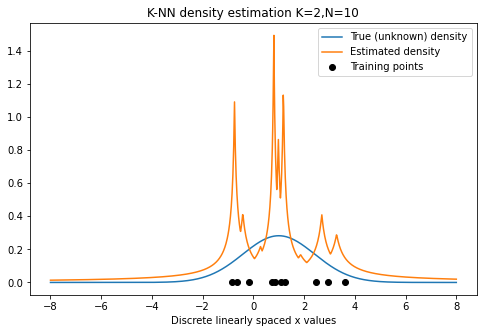

In [363]:
density_estimation_knn(N=10,K=2,
                       mean_value=1,variance_val=2, seed_value=144,
                       n_linearly_spaced_discrete_values=1000)

##### case-3

Distribution Stats:
Size:  10 X-Min:  -0.8364567882597602 X-Max:  3.623439963332321
n_linearly_spaced_discrete_values:  1000


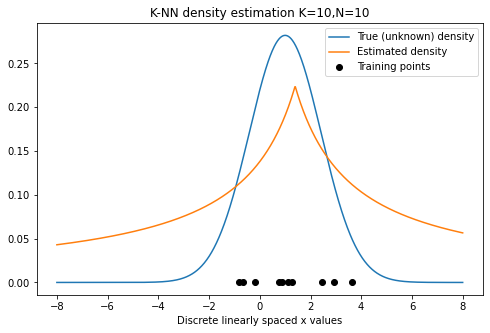

In [364]:
density_estimation_knn(N=10,K=10,
                       mean_value=1,variance_val=2, seed_value=144,
                       n_linearly_spaced_discrete_values=1000)

##### case-4

Distribution Stats:
Size:  1000 X-Min:  -3.627026934137941 X-Max:  5.6367665290810764
n_linearly_spaced_discrete_values:  1000


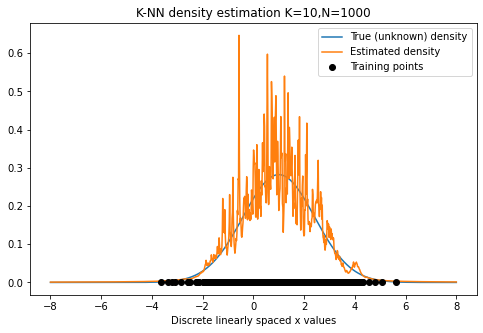

In [365]:
density_estimation_knn(N=1000,K=10,
                       mean_value=1,variance_val=2, seed_value=144,
                       n_linearly_spaced_discrete_values=1000)

##### case 5

Distribution Stats:
Size:  1000 X-Min:  -3.627026934137941 X-Max:  5.6367665290810764
n_linearly_spaced_discrete_values:  1000


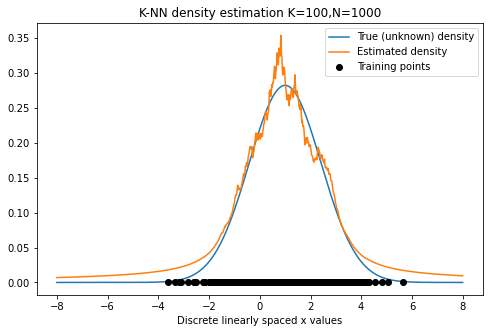

In [366]:
density_estimation_knn(N=1000,K=100,
                       mean_value=1,variance_val=2, seed_value=144,
                       n_linearly_spaced_discrete_values=1000)

##### case 6

Distribution Stats:
Size:  50000 X-Min:  -4.515991233558055 X-Max:  7.109242012764549
n_linearly_spaced_discrete_values:  1000


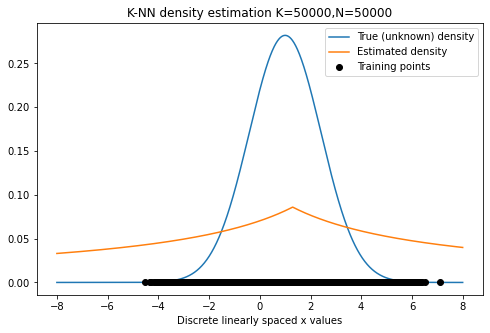

In [367]:
density_estimation_knn(N=50000,K=50000,
                       mean_value=1,variance_val=2, seed_value=144,
                       n_linearly_spaced_discrete_values=1000)

### Q2: Repeat Q1 (i.e., produce six more plots) by replacing the Gaussian density with the following mixture of two uniform densities:

f(x) = 0.4f1(x) + 0.6f2(x)

f1(x) = 

1 if2≤x≤3;

0 otherwise.

f2(x)

0.2 if15≤x≤20;

0 otherwise.

In [538]:
from scipy import stats
from scipy.integrate import quad

def f1x_pdf(x):
    return  np.where((x <= 3) & (x >=2), 1, 0)

def f2x_pdf(x):
    return  np.where((x <= 20) & (x >=15), 0.2, 0)
    

class f1x_distribution(stats.rv_continuous):        
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        # integrate area of the PDF in range a..b
        self.scale, _ = quad(pdf, self.a, self.b)

    def _pdf(self, x):
        return f1x_pdf(x) / self.scale  # scale PDF so that it integrates to 1 in range a..b 

class f2x_distribution(stats.rv_continuous):        
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        # integrate area of the PDF in range a..b
        self.scale, _ = quad(pdf, self.a, self.b)

    def _pdf(self, x):
        return f2x_pdf(x) / self.scale  # scale PDF so that it integrates to 1 in range a..b 



f1x_distribution_object = f1x_distribution(name="f1x_distribution", a=-18,b=18)
f2x_distribution_object = f2x_distribution(name="f2x_distribution",a=-8,b=8)

def get_data_from_mixture_distribution(n_samples):
    """
        Mixture of two uniform densities
        
        Two Step Process, Binomial Distribution
        
        A single sample can be drawn from the mixture density fM in a two-step algorithm (this
            process can be repeated until the desired number of samples have been obtained):
            • Sample an instance of the discrete random variable Z, following Z’s multinomial (binomial)
            distribution. Call the instance z. Then z ∈{1, ··· , c}.
            • Sample an instance of Xz, call it x0, from the density fXz . Return this x0 as a sample
            drawn from the density fM .
        Ref: https://docs.scipy.org/doc/scipy/tutorial/stats.html#building-specific-distributions
        
        Quad integration is required to avoid the runtime errors
    """
    two_distributions = ['f1x', 'f2x']
    np.random.seed(123)
    output_distribution = []
    for _ in range(n_samples):
        # step -1: sampling from binomial distribution can be achieved by this
        selected_distribution = np.random.choice(two_distributions, p=[0.4,0.6])

        # step -2: Sample an instance of Xz, call it x0, from the density fXz . Return this x0 as a sample
        #drawn from the density fM
        distribution_class_obj = None
        if selected_distribution == "f1x":
            distribution_class_obj = f1x_distribution_object
        else:
            distribution_class_obj = f2x_distribution_object
        # Return this x0 as a sample
        #drawn from the density fM
        curr_selected_sample_from_mixture = distribution_class_obj.rvs(size=1)
        output_distribution.append(curr_selected_sample_from_mixture)
    return np.array(output_distribution)

def get_pdf_from_mixture_distribution(ip_dataset):
    """
        Mixture of two uniform densities
        
        Two Step Process, Binomial Distribution
        
        A single sample can be drawn from the mixture density fM in a two-step algorithm (this
            process can be repeated until the desired number of samples have been obtained):
            • Sample an instance of the discrete random variable Z, following Z’s multinomial (binomial)
            distribution. Call the instance z. Then z ∈{1, ··· , c}.
            • Sample an instance of Xz, call it x0, from the density fXz . Return this x0 as a sample
            drawn from the density fM .
        Ref: https://docs.scipy.org/doc/scipy/tutorial/stats.html#building-specific-distributions
        
        Quad integration is required to avoid the runtime errors
    """
    two_distributions = ['f1x', 'f2x']
    np.random.seed(123)
    output_pdf = []
    for ip in ip_dataset:
        # step -1: sampling from binomial distribution can be achieved by this
        selected_distribution = np.random.choice(two_distributions, p=[0.4,0.6])

        # step -2: Sample an instance of Xz, call it x0, from the density fXz . Return this x0 as a sample
        #drawn from the density fM
        distribution_class_obj = None
        if selected_distribution == "f1x":
            distribution_class_obj = f1x_distribution_object
        else:
            distribution_class_obj = f2x_distribution_object
        # Return this x0 as a sample
        #drawn from the density fM
        curr_pdf_val_from_mixture = distribution_class_obj.pdf(np.array([ip]))
        output_pdf.append(curr_pdf_val_from_mixture)
    return np.array(output_pdf)

In [553]:
def density_estimation_knn_mixture_density(N, K,seed_value=12,
                          n_linearly_spaced_discrete_values=1000):
    
    np.random.seed(seed_value)
    
    # input data is X
    input_data = get_data_from_mixture_distribution(N)
    print("Distribution Stats:")
    print("Size: ", len(input_data),
         "X-Min: ", input_data.min(), "X-Max: ", input_data.max())
    
    linearly_spaced_discrete_values = np.linspace(start=-20, 
                                                  stop=20, 
                                                  num=n_linearly_spaced_discrete_values)
    
    print("n_linearly_spaced_discrete_values: ", len(linearly_spaced_discrete_values))
    
    N = len(input_data)
    probabilities = np.zeros_like(linearly_spaced_discrete_values)
    
    fig, axes = plt.subplots(1,1, figsize=(8, 5))
    for index, x_discrete_val in enumerate(linearly_spaced_discrete_values):
        distances = np.abs(input_data - x_discrete_val)
        neighbor_indices_of_sorted_distances = distances.argsort()
        kth_neighbor_distance = neighbor_indices_of_sorted_distances[K-1]
        """
        dV = πd/2/Γ(d2 +1)rd 
        f(x) = K/N * 1/dV
        
        where Γ(·) indicates the gamma function. (Recap: For a positive integer n, 
        Γ(n) = (n − 1)! and Γ(1) = √π, Γ(3) = 1√π, etc.) (Verify: the volume of a
        sphere (d = 3) is 4πr3; the area
         22
         
        When d=1, dV = 2 * rd
        """
        dV = (2 * distances[kth_neighbor_distance])
        probabilities[index] =  (K/N) * 1/dV
        # (K/n) * 1/(2 * dists[neighbour_K])
        
    true_densites = get_pdf_from_mixture_distribution(linearly_spaced_discrete_values)
    
    line1, = axes.plot(linearly_spaced_discrete_values, true_densites)
    line2, = axes.plot(linearly_spaced_discrete_values, probabilities)
    points3, = axes.plot(input_data, np.zeros_like(input_data), 'bo', color='black')
    axes.set_title(f"K-NN density estimation K={K},N={N}")
    axes.set_xlabel("Discrete linearly spaced x values")
    axes.legend([line1, line2, points3], ['True (unknown) density', 'Estimated density', 'Training points'])

##### case-1

Distribution Stats:
Size:  1 X-Min:  7.999999999999989 X-Max:  7.999999999999989
n_linearly_spaced_discrete_values:  1000


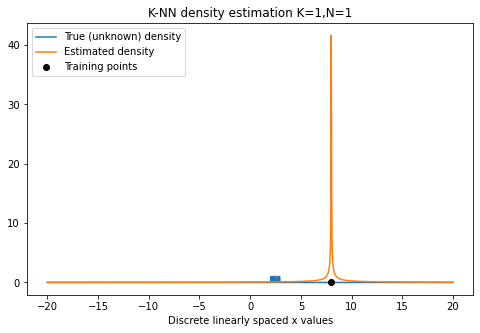

In [554]:
density_estimation_knn_mixture_density(N=1,K=1)

##### case-2

Distribution Stats:
Size:  10 X-Min:  2.175451756800008 X-Max:  8.0
n_linearly_spaced_discrete_values:  1000


/Users/reshmapriyamannemuddu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1801: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


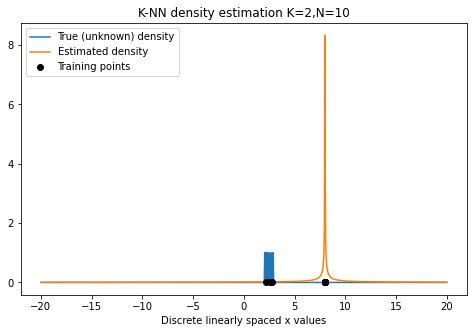

In [555]:
density_estimation_knn_mixture_density(N=10,K=2)

##### case-3

Distribution Stats:
Size:  10 X-Min:  2.175451756800008 X-Max:  8.0
n_linearly_spaced_discrete_values:  1000


/Users/reshmapriyamannemuddu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1801: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


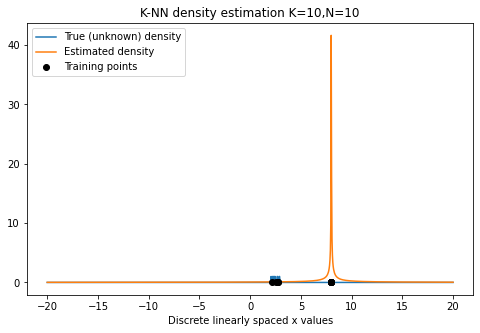

In [556]:
density_estimation_knn_mixture_density(N=10,K=10)

##### case-4

/Users/reshmapriyamannemuddu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1801: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


Distribution Stats:
Size:  1000 X-Min:  2.103884240333717 X-Max:  16.816688512214707
n_linearly_spaced_discrete_values:  1000


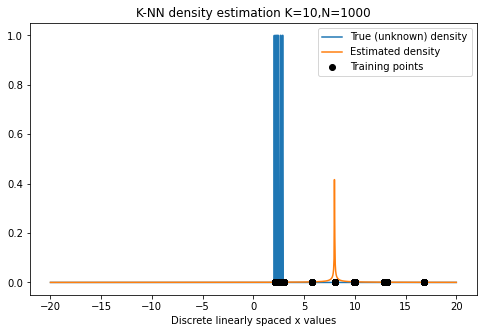

In [557]:
density_estimation_knn_mixture_density(N=1000,K=10)

##### case-5

/Users/reshmapriyamannemuddu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1801: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


Distribution Stats:
Size:  1000 X-Min:  2.103884240333717 X-Max:  16.816688512214707
n_linearly_spaced_discrete_values:  1000


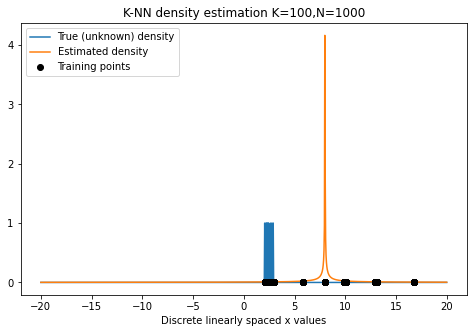

In [558]:
density_estimation_knn_mixture_density(N=1000,K=100)

##### case-6

In [507]:
density_estimation_knn_mixture_density(N=50000,K=50000)

/Users/reshmapriyamannemuddu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1801: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


KeyboardInterrupt: 

### Q3:Estimate the (mixture-)density f(x) (that was used in Q2) using the kernel method (use Gaussian kernel). 


That is, first obtain an iid sample of N ≥ 1 points from the true density f(x), and then obtain, by Gaussian KDE, an estimate of f(x) using those N sample points. Produce plots (each plot showing the data points and the true and the estimated densities), one plot for each of the following sample sizes (note: sample size= N): 1, 2, 5, 10, 50, 100, 1000. A total of seven plots are to be produced for this part.

In [559]:
from sklearn.neighbors import KernelDensity

In [590]:
def density_estimation_guassian_kernel_mixture_density(N, seed_value=12,
                          n_linearly_spaced_discrete_values=1000):
    
    np.random.seed(seed_value)
    
    # input data is X
    input_data = get_data_from_mixture_distribution(N)
    print("Distribution Stats:")
    print("Size: ", len(input_data),
         "X-Min: ", input_data.min(), "X-Max: ", input_data.max())
    
    linearly_spaced_discrete_values = np.linspace(start=-10, 
                                                  stop=20, 
                                                  num=n_linearly_spaced_discrete_values)
    
    print("n_linearly_spaced_discrete_values: ", len(linearly_spaced_discrete_values))
    
    N = len(input_data)
    
    input_data = input_data.reshape(-1,1)
    fig, axes = plt.subplots(1,1, figsize=(8, 5))
    kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(input_data)
    linearly_spaced_discrete_values_reshaped = linearly_spaced_discrete_values.reshape(-1,1)
    density_estimates = kde.score_samples(linearly_spaced_discrete_values_reshaped)
    
    true_densities = get_pdf_from_mixture_distribution(linearly_spaced_discrete_values)
    print("density_estimates : Min and Max", density_estimates.min(), density_estimates.max())
        
    line1, = axes.plot(linearly_spaced_discrete_values, true_densities)
    line2, = axes.plot(linearly_spaced_discrete_values, density_estimates)
    points3, = axes.plot(input_data, np.zeros_like(input_data), 'bo', color='black')
    axes.set_title(f"Guassian KDE density estimation N={N}")
    axes.set_xlabel("Discrete linearly spaced x values")
    axes.legend([line1, line2, points3], ['True (unknown) density', 'Estimated density', 'Training points'])

##### case-1

Distribution Stats:
Size:  1 X-Min:  7.999999999999989 X-Max:  7.999999999999989
n_linearly_spaced_discrete_values:  1000
density_estimates : Min and Max -648.2257913526439 -0.2260799295098803


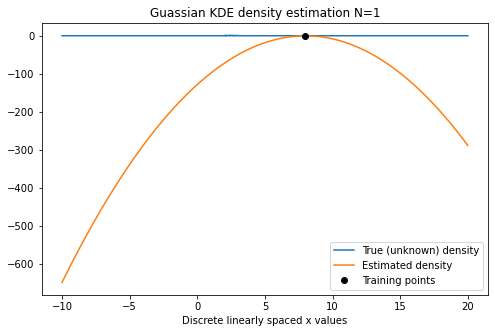

In [591]:
density_estimation_guassian_kernel_mixture_density(1)

##### case 2

Distribution Stats:
Size:  2 X-Min:  2.5513147685746547 X-Max:  7.999999999999989
n_linearly_spaced_discrete_values:  1000
density_estimates : Min and Max -315.9899433728851 -0.9189415974230246


/Users/reshmapriyamannemuddu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1801: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


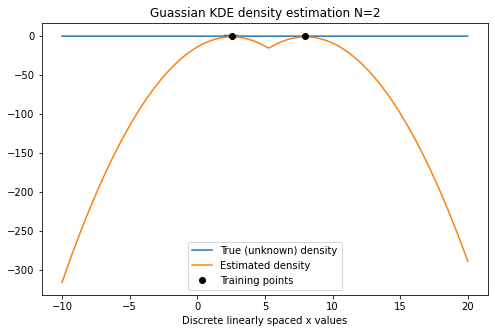

In [592]:
density_estimation_guassian_kernel_mixture_density(2)

##### case-3

Distribution Stats:
Size:  5 X-Min:  2.5513147685746547 X-Max:  8.0
n_linearly_spaced_discrete_values:  1000
density_estimates : Min and Max -316.9062341047592 -0.44922348082409


/Users/reshmapriyamannemuddu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1801: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


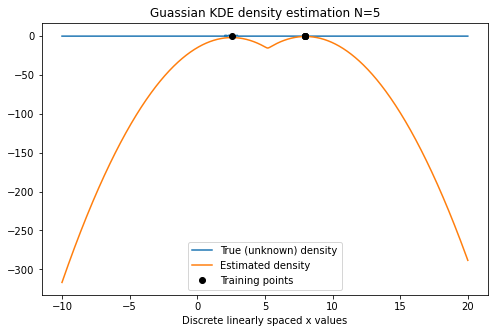

In [593]:
density_estimation_guassian_kernel_mixture_density(5)

##### case-4

Distribution Stats:
Size:  10 X-Min:  2.175451756800008 X-Max:  8.0
n_linearly_spaced_discrete_values:  1000
density_estimates : Min and Max -299.0116274015044 -0.7369055532758715


/Users/reshmapriyamannemuddu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1801: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


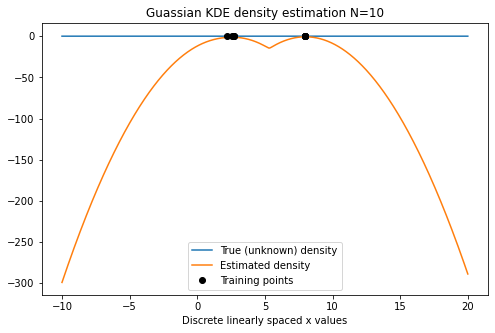

In [594]:
density_estimation_guassian_kernel_mixture_density(10)

##### case-5

/Users/reshmapriyamannemuddu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1801: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


Distribution Stats:
Size:  50 X-Min:  2.175451756800008 X-Max:  16.816688512214693
n_linearly_spaced_discrete_values:  1000
density_estimates : Min and Max -300.5459011299019 -0.736905553275871


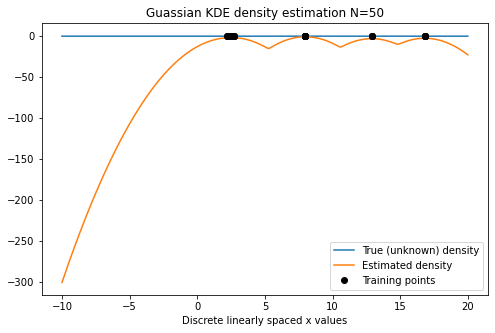

In [595]:
density_estimation_guassian_kernel_mixture_density(50)

##### case-6

/Users/reshmapriyamannemuddu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1801: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._pdf, _a, x, args=args)[0]


Distribution Stats:
Size:  100 X-Min:  2.1308949508938833 X-Max:  16.816688512214693
n_linearly_spaced_discrete_values:  1000
density_estimates : Min and Max -298.55030867844187 -0.7368949019405853


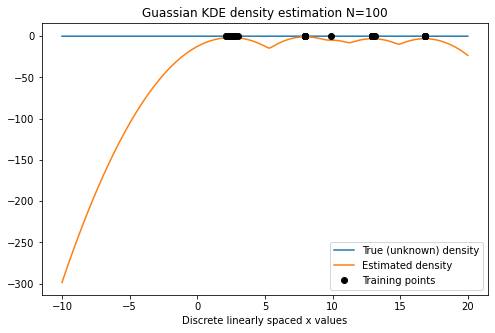

In [596]:
density_estimation_guassian_kernel_mixture_density(100)

In [ ]:
density_estimation_guassian_kernel_mixture_density(1000)

/Users/reshmapriyamannemuddu/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1801: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._pdf, _a, x, args=args)[0]
